<h1><center>A Guide on A/B Testing</center></h1>

<h2> Contents </h2>

This project aims at giving the <b>theoretical background</b> for complete A/B testing. We do not make an attempt at coding or data engineering involved in carrying out A/B testing. This is because we believe that these days, A/B testing are carried out by existing modules in the company or by using third party A/B testing providers e.g. optimizely or google analytics.

1. Introduction
2. Statistical Background
3. Selecting the Metrics for A/B Testing
4. Designing the Experiment
5. Analyzing results
6. Bayesian approch to A/B Testing
7. Multi-variate A/B Testing
8. Profit maximizing A/B Testing (Marketing Science Paper)(Marketing Science article)

In [24]:
# loading all the requisite libraries that will be required for the toy model
def load_library():
    from scipy.stats import beta
    import matplotlib.pyplot as plt
load_library()

<h2>Introduction to AB Testing </h2>

A/B testing is a general methodology used online when we want to test new products or features. A/B test allows us to determine <b>scientifically how to optimize products or features<b> (a website or an app or any system) by trying out possible changes and see what performs better with your users. It allows to make <b>data-driven decisions</b> rather than relying on intution about user preferences. To keep the discussion concise, hereafter, we will explain A/B testing as a method employed to determine if a new feature F2 should replace existing feature F1. This feature could be a small change (e.g. changing the font or color of a button on your website) or a complicated change (using deep learning for product recommendation in amazon). This feature could not even be user visible (changing the ranking system of friend suggestion in facebook).  

Broadly speaking, A/B testing uses two sets of users. First set, the <b>control group</b>, is shown Feature F1 and the second set, <b>treatment group/ experiment group</b> is shown the new feature F2. A/B testing uses rigorous post experiment analysis to  to determine which feature performs better with users. A/B testing is generally used when we compare two options. If more than 2 options (of features) are tested, it is called multi-variate A/B testing (or split test). A brief explanation of A/B testing is shown in Figure 1 where a company wants to increase its user engagement.

<img src="figures/AB.jpg" width="800">
<center>Figure 1. An example of A/B testing and split test</center>

<h3>History of A/B testing</h3>

A/B testing is a sort-of modern day term after computers became mainstream. Such analysis have been carried out since ages. Some history on testing:

1. Random experiments were used by farmers for identifying the most productive variety of crop. 
2. They are similar to clinical trials in the field of medicines.

A/B test is not the only option for selection of better features (or creating best feature set incrementally). There are  techniques e.g. <b>surveys, interviews,focus groups</b>. They can provide more deeper qualitative data (higher resolution) than A/B tests as we know much more about the user in these techniques. However, A/B tests can easily provide data from more number of users, more diverse group of users and are less expensive to conduct over large scale.

<h3>When NOT to do A/B test</h3>

While A/B testing is a very handy tool to have, it may not be well suited for all types of changes or changes that are difficult to measure. <b>A/B testing is most effective when we have a small set of changes and features to test</b>. If we change a large number of features in a website, we would not be able to identify the reason for increase/decrease in user engagement, i.e., which feature change contributes the most for that increase/decrease. The changes should be incremental and not drastic. For example, we cannot change the outlook of a website completely. Worst case, this may lead the users in the treatment group to uninstall your app. Also, the <b>expected change should be observed immediately</b> (A/B testing is not good for features that take a long time before changes are observed). For example, if we want to measure car sales, users take 2-3 months to select and buy a car. Running an A/B test for 1 week might turn useless. A/B testing is <b>not reliable if randomization in the experiment cannot be achieved</b> (we cannot give life saving drugs to patients randomly). It is said that we cannot establish casuality (effect of change in a feature) from observational studies, we need completely random experiments to establish the effect of change in the feature.

<b>Metric</b>, which we discuss later in detail, also determine if A/B testing can be conducted.  If our metric is <i>how many times a user returns to our electricity bill payment website </i>, it might not be a good test if run for 1 week, given a customer will only return after 1 month. Or, if we measure, <i>the number of user referrals</i> in a mobile app, we dont know if the users would refer in 1 day or 1 month, so referrals might not be the best metrics for A/B tests.

The <b>duration of A/B testing</b> also determines if A/B testing should be done. Too short a duration gives unreliable results while running it too long could be expensive. Also, if we run A/B testing for long, users might "learn" the changes in feature. This will make the test unreliable.

<h2>Statistical Background </h2>

Here we discuss the minimum statistics we need to know for getting started with A/B testing. There is no upper limit on the advantages of knowing more statistics. A/B testing needs rigorous post experiment analysis before implementing a feature change to ensure that we are confident on the results (and the observations were not just by chance).

<h3>Randomization</h3>

A/B testing is similar to causal analysis. It aims to identify if the changes in user response is due to the new feature. For example, if an existing feature F1 is the baseline, is there an increase in user engagement when users see new feature F2. Randomization is the most important assumption in field experiments. When dividing the users into two groups (control and treatment), <b>it should be done completely random and both groups should be representative of the user base</b>. Once you decide to run the experiment and assign users to control and treatment group, check that the user characteristics are similar (e.g. both groups should have similar ratio of males to females, age distribution, income). If the experiment is completely randomized, there is a high probability that these characteristics would be similar in both groups. 

There are different techniques were randomization cannot be achieved. One such method is <b>Quasi-experimentation</b>. For example, ride sharing services want to check a policy and they can compare it in two different cities. Another technique is <b>controlling for the different variables</b> in control and treatment group. For example, keeping a track if the user is employed or not, or age of the user. These helps in isolating the effect of feature F2.

<h3>Confidence Interval </h3>

There could be a large variety of metrics that could be tested (depending on the company requirement). These metrics could follow different distributions. In this project, we consider metrics that follow binomial or normal distribution. 

Binomial distribution is used to model dichotomous outcomes (success/failures, 0/1). Thus, it is characterized by the probability of success (e.g. what is the probability that a user clicks on the sing up button when they visit the page). Normal distribution is used to model continuous outcomes. It is characterized by its mean and variance.

First, a <b>difference between standard deviation and standard error</b>. We can never collect the data from the whole population, so we estimate using samples of data drawn from the same population. Standard deviation is the <b>measure of spread</b> around the mean of the data if the data is normally distributed. It is used as a <b>measure of dispersion</b> for non-normally distributed data, however, it is still a <b>valid measure of variability</b> (spread and dispersion). If we collect a sample of data, we can calculate the spread of data by measuring its standard deviation. Similarly, if we collect data from many samples, we can observe different mean and different spread for each sample. Also, we will observe different means (from different samples) and <b>the mean itself follow a distribution</b>. The spread (standard deviation) of these means (centered around mean of means) is called <b>standard error</b>. Standard error can be estimated from a simple sample by calculating its standard deviation and dividing it by the square root of the sample size. Thus, standard error is always smaller than standard error.

Confidence interval contains the two extremes, equi-distant from the center. In binomial distribution, proportion of success in the sample (e.g. number of users who click the button out of total number of visitors) is the center and in normal distribution, mean of the sample is the center. Distance from center to the boundary of the confidence interval is called <b>margin or error</b>. Margin of error is calculated by multiplying z-score of confidence level and the standard error. And the confidence interval is calculated by adding and subtracting the margin of error to and from the center. 

A 95% confidence interval can be defined as: <i>if we collect samples from the population over and over again and construct the 95% confidence intervals around the mean of these samples, 95% of the time, we would expect the true value of the population to be covered in these intervals.</i>

<img src="figures/Confidence_interval.jpg" width="800">
<center>Figure 2. Confidence interval and its concepts</center>

<h3>Sample size calculation </h3>

How long the A/B tests should be continued? A/B testing should be done for metrics that can be observed in short time. However, the sample size (or data collected from A/B testing) should be enough for us to confidently accept/reject the results from A/B testing. First we discuss <b>p-value</b> and <b>significance levels</b>.

In hypothesis testing, null hypothesis states the world we believe exists. Null hypothesis is the baseline in A/B testing (e.g. No difference in user engagement between control group and treatment group). Alternative hypothesis looks into our interest of difference (e.g. user engagement increases or not by using F2). <b>p-value</b> is the probability that the world we believe exists. For example, if p-value is 0.02, it says, there is a 2% chance that the world of null hypothesis exists. if p-value is smaller than the level of significance, we reject the null hypothesis, assuming we observed it by chance. Thus, <b>significance level</b> is the probability of rejecting the null hypothesis when it is true. Generally the level of significance is kept at 5%.

In A/B testing, we compare two samples. We expect the two samples to behave differently (if we expect the feature to have an impact). Thus the standard error would be different for the two samples. Thus we use pooled standard error (<i>p-SE</i>). Let <i>d</i> be the difference (of probability of click) between the two groups. If our null hypothesis says there is no difference between the two groups, we expect <i>d = 0</i>. We can calculate the confidence interval, centered around 0 with margin of error by using <i>p-SE</i>. If <i>d</i> lies on either side of the extreme of the confidence interval (smaller than left side or larger than right side), we reject the null hypothesis as unlikely and say the difference between the two samples is <b>statistically significant</b>.

In hypothesis testing, we might fall into two errors. In <b>Type-I</b> error, or alpha, we reject null hypothesis given it is true. In <b>Type-II</b> error, or beta, we fail to reject the null hypothesis, given it is false. They are also called producer's risk and consumer's risk respectively. Type-II error can be more serious (e.g. testing that a drug works and giving it to patients given that the medicine doesn't actually work). The power of test is defined as 1-beta, that is the probability to reject the null hypothesis when it is false. Hypothesis testing is based on the assumption that we know how many samples were needed to be collected to detect the change we wanted to see. But in practice, it is other way round, that is, we first collect data and then do the hypothesis testing. 

Sample size depends on the desired power of the test and desired level of change we want to detect in the two groups (control and treatment). This <b>level of change we want to detect is called minimum detectable effect (MDE)</b>. For <b>higher power of the test, we need larger sample size</b>. <b>The smaller the change we want to detect, the larger sample size we need</b>. For example, in medicine, we might want to detect if the difference is 5% - 10%. In click through rate on advertisement, we might want to detect even a 2% change. The change we want to detect is called practically significant change. Thus, A/B testing results should detect practically and also statistically significant changes. The relation between these is explained below in Figure 3.

Left part of Figure 3 shows what does power of a test graphically. As the sample size increases, the standard error decreases, thus the distribution become tighter and tighter. As seen from the figure, the chances of wrongfully concluding that no difference exists (even though difference exists) decreases. Also, as the distributions move away from each other (if there is larger difference), the power of the test is high as it can easily detect the change. Thus, it becomes difficult to detect smaller changes. Thus power increases on increasing the sample size. Power is kept at 80% generally.

Check the online calculator (by optimizely) used for calculating the sample size
https://www.optimizely.com/sample-size-calculator/

<img src="figures/Power.jpg" width="900">
<center>Figure 3. Calculating the Power of a test</center>

<h2>Selecting the Metrics for A/B Testing </h2>

With the minimum statistical knowledge required for A/B testing, we begin the first step in designing A/B testing. It is very critical to understand how we select our metrics for the test as it will define the success of the A/B tests.

<h3>Business Sense</h3>

The most important property of the metrics is that it should satisfy business needs and <b>add some values to the company</b>. It could be economic value e.g. increase in user clicks or it could also be done for understanding user behavior. The managers should know what are they going to  use the metrics for. <b>The metrics should be well defined</b>, that is, there should be no confusion on what formula is to be used for calculating the metric (click through rate is different from number of clicks/views). The developers should be able to <b>measure the metrics in short time</b>. For example, sign up does not tell if the the user is going to refer or not. As mentioned before, the metrics should not take long time to measure (e.g. effect of a soap on skin cancer). The company should have complete information about the metric. We should be <b>able to measure the metric </b>(is it mean, median) and understand possible error in collecting the metrics (e.g. if click through rate increase by 30%, there might be a bug in the code in collecting the data). 

<h3>Filtering</h3>

We should be able to identify issues while collecting these metrics. For example, we <b>should check how the data is collected </b> (e.g. check that there is no spam) that is affecting our data collection and we should be able to filter these. Users in control and treatment group should not know if they have been placed in one of the groups (it affects the randomization of the experiment and users might self-select to either join or leave the experiment). Also, users should not know that an experiment is being carried out. This might affect the metrics as users in control group would want to test the new feature if they know about it and this might pollute the current experiment.


<h3>Invariance check</h3>

Before running the experiment and analyzing the results, A/B testing should go through sanity checks for randomization. <b>The distribution of user characteristics in control and treatment groups should be the same</b>. This can also be done by A/A testing. That is instead of sending the new feature F2 to the treatment group, just send feature F1. As the user groups are randomly created, there should be no difference in user engagement between both the groups.


<h3>Sensitivity and Robustness</h3>

The metrics should be <b>sensitive enough to move if there is an actual difference in the response in control and the treatment group</b>. but it should not be very sensitive that a slight change would result in a very different measures. Thus, the <b>metric should be robust to changes</b>. For example, if our metric is mean of total donations, mean is sensitive to outliers. If our metric is median, it is robust to outliers but it might be very insensitive. For example, if just 1% of users buy a product, and we use median, the median might not move and it will 0 in both the groups.

Before selecting the metrics, a histogram of the metric for the existing users should be used to identify the nature of metrics. Different metrics include mean, median, percentiles, ratios, or percent change. Percent change is insensitive to changes in absolute values (which is desirable in many situations). <b>A/A test might also be able to test too sensitive metrics as the metrics will be different only because the users are different</b>.

<h3>Variability</h3>

Variability or variance is critical for analyzing the results of A/B testing as we use confidence intervals and hypothesis testing for detecting the change. Metrics may follow different distributions. <b>For calculating the confidence interval and analyzing the results, we should know about the distribution of the metrics</b> and how to calculate the variability. Estimating variance may not always be easy (e.g. median of a non-normal distribution or a complex distribution) when analytical result for variance calculation is not possible.

If the variance cannot be calculated variance analytically, we can <b>calculate it empirically</b>. Variability calculation makes an underlying assumption that we know the inherent distribution of the metric. We it is complex, we can run a lot of small A/A tests to identify the underlying distribution of the metrics. Or we can do one big A/A test and use techniques like bootstrapping (sampling with replacement) to get the underlying distribution of the metrics.

<h2>Designing the Experiment </h2>

Now that we understand what metric we will be using for our A/B testing, we need to design the experiment. Studies should be designed in collaboration with the designers. Designing the experiment includes the following:

1. Selecting the subject
2. Selecting the population for control and treatment group
3. Sample size needed to run the experiment and duration of the experiment

<h3>Selecting the subject</h3>

It is important to define how we <b>define our subjects</b>. If we do not consider subjects and randomize, same user may see F1 and F2 on two different occasions. Thus, it is important to <b>ensure that a user sees only one of the options</b>. For example, in a mobile app, email id of the user can be selected as the unique identifier for a user. But how do we collect data for users who have not signedup for the app? If we just consider the users who have signedup, we will be biasing our data for "better customers". If we use web cookies to identify a user, what happens if the user uses multiple devices and we get a different id for the same user? 

Assigning only <b>one feature to one user during the experiment is called consistency</b> (a user should always see the same feature they were assigned, every time they use the website/app). The variable that provides a unique id to the a subject is called <b>unit of diversion</b>. When we measure metric, the denominator is called <b>unit of analysis</b>. For example, if we consider a webpage, and our metric is the number of clicks/user, user is the nunit of analysis (also, the diversion is user as we count the total number of clicks for unique user). Variability of the metric can also be affected by the diversion we select. If the unit of analysis is the same as the unit of diversion, <b>metric variability</b> is lower when they aren't same.

<h3>Selecting the population</h3>

The most important criteria for A/B testing is <b>randomization</b>. The population in the control group and the treatment group should have similar properties (the more similar the better). For example, if the average age of users in control group is higher than that of the treatment group (and we younger people use their phones more), the results will be biased and it will overestimate the effect of F2. 

There are some techniques called <b>intra-users</b>. In these techniques, the same user is exposed to both the features (thus the population property is exactly the same for both the control and treatment). However, it is risky. For example, the order in which the features were exposed to the user might have an effect on user response. For example, if users liked the first feature and not like the second feature, they may leave the app. Thus, it is better to use inter-users (or standard A/B test with a control and the treatment group).

In <b>medical trials</b>, to maintain the similarity of population, cohorts are selected. In best case scenario, two very similar users (patients) can be selected with similar demographics and medical history and paired together (send one to control group and one to the treatment group). In nature vs nurture debate, two identical twins were the best sample for the study as their nature (conditions under which they were born) was exactly the same. Online experiments do not have the luxury to know about the users.

While selecting the population, the users <b>should not anticipate the new features</b>. There should be no cross sharing of information. For example, if it is widely known that a company has added a new feature, some users will be frustrated if they wanted that feature and they were kept in the control group (media attention should be avoided). In many research studies, the researchers (and anyone involved in the project) do not participate in the project as they know what to expect from the new feature.

<h3>Quasi experiments</h3>

<b>Whom to target?</b> While the users who are to be affected by the study should be the ones targeted. For example, if we are changing some features only for english speaking users, we should not keep non-english speakers in the study. 

<h3>Selecting the sample size and duration of the experiment</h3>

We discussed the <b>sample size calculation in Section 2.4</b>. It depends on the variability, so all the additions of variability should be considered e.g. inherent variability of metric, variability due to target population selection and variability due to the unit of diversion (and unit of analysis).

The length of the experiment is determined by how <b>fast the data is collected and to what proportion of the traffic the experiment is sent to</b>. We should collect enough samples, at least as much we calculated using sample size calculation. Collecting data can be expensive but small data size might affect the reliability of the results. Testing should avoid <b>exposure</b>. It should not be used for too long such that users in treatment group can spread information about the change to their social group.

<b>Timing</b> of the experiment should also be considered. Experiments should not be run just a week before Christmas as it might confound/ over estimate the effect of new feature F2. <b>It should be able to capture seasonality</b>. For example, if the company observes huge variability (say seasonality-it could be weekend vs weekdays or month to month variation) the experiment should be run long enough to capture the seasonality.  

We should keep the experiment long enough so that there are no <b>learning effects</b> on account of the users. Learning means user adopting to the change or not. For example, if a new feature is introduced, user might want to check that feature initially and then it would plateau (thus we need to control for the time). A user, if do not like the new feature, might get frustrated and use it less. But they might get comfortable/ adopted with the feature. If we are trying to understand this learning effects, we need pre-experiment and post-experiment analysis (similar to difference in difference in causal analysis).

<h2>Analyzing Results </h2>

Once we define the metrics, set up the experiments and get the data from the experiment, we are ready to analyze the results. using the analysis, we want to conclude the results of the experiment. Analyzing the results rigorously is critical as the based on the conclusion, the change would be implemented.

<h3>Stopping the experiment</h3>

In A/B testing, the experiment can be stopped under two condition. One, when enough data points have been collected. Second when the results are statistically significant. Based on the analysis of the results, managers can decide if they want to continue the experiments or not (if the difference is practically significant). It also depends on the manager as how long they want to continue (till they are completely confident in the results).

<h3>Sanity Checks</h3>

A/B testing is an iterative process. Based on checks and learnings from these sanity checks, we need to redesign the experiments. Check if the data captured is correct (looks reasonable). For example, there is no drastic or incomprehensible changes in the metrics. We also need to <b>check the metrics of the two groups before we run the experiment</b>.

Another important sanity check is to <b>check the other metrics</b>. In Section 3.3, we used A/A test to check the invariance in metrics between the two groups. We also need to check that other metrics (which should not change on changing the features under study) remain <b>invariant, or there is no significant change between the two groups</b>. They might change if they are highly correlated with the evaluation metric. If sanity checks fail, do not proceed with the analysis.

<h3>Decision</h3>

After hypothesis testing, the managers need to change if the results are <b>statistically significant and practically significant</b>. They should also check the direction of the change (is it in positive direction to the business or negative). If it is negative direction, go for sanity check and diagnosis as why is this happening. if results are significant, move ahead with implementing the changes. If the result is not significant (statistically and practically), managers many decide to continue the experiments or stop the experiment. They may also want to check other metrics if they change (for next A/B test).

We might also want to check if there is a significant improvement in some sub-groups and on aggregating, the difference is not observed. For example, there may be sub-section of young users who really like the new features. But as the number of older adults is higher, the results were insignificant. it might be useful for the company to create a new feature for this sub-group.

<h2>Bayesian Approach to A/B Testing </h2>

Before going through the Bayesian A/B testing, it is important to understand <b>bayes theorem, and definition of prior, likelihood and posterior</b>. Please go through the following video: https://www.youtube.com/watch?v=HZGCoVF3YvM before starting to read the bayesian part of A/B testing.

<h3>Frequentist vs Bayesian in A/B testing</h3>

We discussed frequentist approach for A/B testing. <b>Frequentist approach uses p-value</b> to determine if feature F2 performs better than feature F1. If the difference between the control and treatment group is statistically significant (based on p-values), or if enough data has been collected and it is still statistically not different, A/B testing is stopped. <b>There is no uncertainty in the frequentist approach</b> (when we stop, the results say if we should go go the changes or not). A/B testing is believed to be biased for "baseline/ keeping as is". After A/B testing, we have to decide if the difference is (statistically and practically) significant so that it can be implemented (there is a cost in deploying the new features/ products/ upgrade to the system).

1. Bayesian A/B Testing employs Bayesian inference methods to give you <b>‘probability’ of how much A is better (or worse) than B</b>. A frequentist approach cannot provide this measure. This makes it <b>more intuitive and slightly easier</b> to convey as compared to frequentist approach which requires some knowledge of statistics. 
2. <b>Inference for bayesian A/B testing can be updated continuously</b> as new data is observed. Thus, we do not have to wait for certain amount of data and its analysis to decide if we want to stop or continue with the experiment (Bayesian A/B testing also performs better with more data). 
3. <b>Bayesian approach embraces uncertainty</b>. It tells us how certain are we that F2 is better than F1. Frequentist approach uses 95% confidence levels (reject if p-value < 5%). Why these numbers? It should be case based, why so arbritary? These p-values keep changing (as we collect more data). p-Values may sometimes go below 5% and it would be a mistake to stop our experiments there as it just came down for that one instance.

<h3>Steps for Bayesian A/B testing</h3>

Using A/A testing or using the domain knowledge, <b>first a prior is built</b> on the metrics considered for the experiment (e.g. managers might have a good idea of clickthrough rate or donations collected). Using the distribution from which prior is built, appropriate prior distribution can be selected. Life will be so much easier if we can use a conjugate prior to the distribution we expect to be followed by the metrics. For example, if we model clickthrough rate as binomial distribution, we can use beta distribution as its prior. 

We know from bayes theorem that <b>posterior depends on the relative strength of prior and likelihood</b>. If we are confident about our prior, that is, we are sure that the metrics follow a certain distribution with certain parameters (probability of clickthrough ranges from 0.1 to 0.15, or the 25th and 75th percentile of donation value is \\$30 and \\$60), we can use a strong prior. If we are not so sure, we can use a weak prior. <b>Strength of likelihood increases as more and more data is collected</b>. Thus, generally a we start with a weak prior and get the posterior in an online manner as more and more data is observed (and posterior converges over time as more data is collected). 

An example of strength of prior is shown using beta distribution. Please note that the mean (given by $\frac{\alpha}{\beta}$ ) remains the same for the three distribution but variance changes (and hence the strength changes). Beta(4,21) is weaker than Beta (8,42) which is weaker than Beta (32,164). <b>By weaker we mean -- if we add new data points, how easily the distribution can be changed as we observe new data points</b>. For example, if we observe four more data points where none of them was success, the posterior distribution would be Beta(4,25), Beta (8,46) and Beta (32,172). Thus the posterior for the weak prior looks very different from the prior distribution. Bayesians always face the criticism of how do we select the prior and what happens if we are not able to find a conjugate prior - that is where domain knowledge and rigorous sanity check comes in. There are methods are monte carlo simulation where we cannot find a proper conjugate prior or the posterior is very complex. This is beyond the scope of this project for A/B testing.

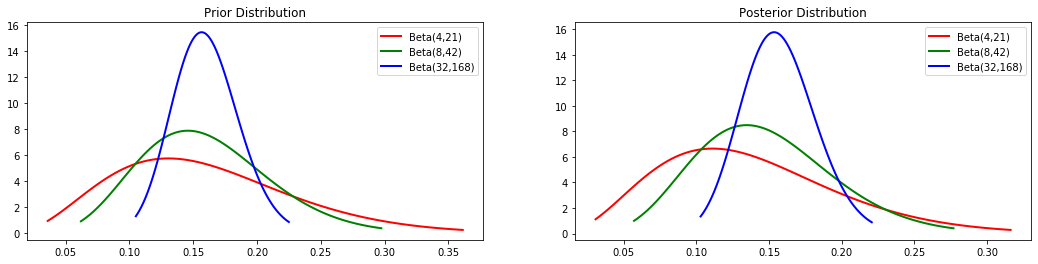

In [22]:
# Code for showing the examples of prior and posterior distribution 
def prior_posterior():
    fig = plt.figure(figsize=(18, 4))

    A = [4,8,32]
    B = [21,42,168]
    color = ['r','g','b']
    plt.subplot(1,2,1)
    for j in range(3):
        a, b = A[j], B[j]
        mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')

        x  = np.linspace(beta.ppf(0.01, a, b),beta.ppf(0.99, a, b), 100)
        rv = beta(a, b)
        plt.plot(x, rv.pdf(x), 'k-', lw=2, label="Beta("+str(A[j])+","+str(B[j])+")",c=color[j])
    plt.legend()
    plt.title("Prior Distribution");

    plt.subplot(1,2,2)
    for j in range(3):
        a, b = A[j], B[j]+4
        mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')

        x  = np.linspace(beta.ppf(0.01, a, b),beta.ppf(0.99, a, b), 100)
        rv = beta(a, b)
        plt.plot(x, rv.pdf(x), 'k-', lw=2, label="Beta("+str(A[j])+","+str(B[j])+")",c=color[j])
    plt.legend()
    plt.title("Posterior Distribution");
prior_posterior()

<h3>Analyzing the results in Bayesian A/B testing</h3>

In bayesian A/B testing, <b>we do not have to wait for all the data to be collected</b>. For example, if we calculate from sample size calculation that experiment should be run for 28 days. In frequentist approach we have to wait for 28 days before we run the results or make a conclusion. In bayesian A/B testing, we can start analyzing and updating our belief about the results from day 1 (by updating the posterior).

As <b>we observe more and more data, the posterior converges</b>. We have two posteriors, one from control group and one from the treatment group (both have the same prior as we assume that there is no difference between the two groups). If the manager is confident that the posterior has converged (the variance for both the density plots has decreased), the experiments can be stopped.

<h3>How do we analyze the posteriors</h3>

How do we analyze the results? or How do we say that there is a 97% probability that F2 is better than F1? <b>We use Monte Carlo simulation</b>. Please read on Monte Carlo simulation. Monte carlo methods is one of the 10 algorithms named as the algorithms of the 20th century. Monte Carlo methods is easy to wrap our head around as what it is doing. It is easy to understand intuitively but it is itself a very big topic. Hence it is beyond the scope of this project.

We can use the posterior (current posterior obtained for control and treatment group after <i>n</i> days) to generate random samples from the two distribution. Using these sample, <b>we can find the probability (say 97%) if F2 is better than F1</b> (counting the number of samples where a sample from posterior of treatment group was better than the respective sample from the posterior of the control group and dividing by the total number of random samples). This 97% can be equated with saying that the one sided p-value is 0.03. 

It also allows us to <b>get relative improvement of F2 over F1</b>. For this, we can plot the ratio of samples from posterior of treatment groups to the posterior of the control group. The histogram could help us in visualizing how much the improvement will be. For example, as shown in the histogram below, the improvement centers around 1.1 times to 1.3 times. Thus, we can expect an improvement of 10%-30% (if this is greater than our practical significance level when we started the experiment, we can go ahead and implement the change in the feature and deploy F2).

<h2>Multi-variate A/B testing</h2>

<h2>Profit maximizing A/B Testing (Marketing Science Paper)</h2>